In [2]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples = {}".format(n_samples))
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./Datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples = 150
n_samples = 6118
n_samples = 86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


In [3]:
from sklearn.cluster import DBSCAN

In [4]:
import matplotlib.pyplot as plt
colors=['b','g','r','c','m','y','k']
# colors=['b','g','r','c','m','y','k', 'w'] # se si vuole avere i noisy point "white"

def plot_model(dbscan, data, title, size=(10,10), msize=10):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    # print(dbscan.labels_)
    # label = -1 significa noisy point
    n_noise = list(dbscan.labels_).count(-1)
    print("Numero di punti: {}".format(len(data)))
    print("Numero di noisy point: {}".format(n_noise))
    # set() restituisce i diversi valori a cui sottraggo 1 se ci sono noisy point
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    print("Numero di cluster trovati: {}".format(n_clusters))
    c = [colors[l] for l in dbscan.labels_] #labels_ contiene le etichette assegnate ad ogni esempio
    plt.scatter(data[:,0], data[:,1], s=msize, c=c, marker='.') # dati
    
    plt.show()

In [5]:
from sklearn.neighbors import NearestNeighbors

def reachability_distance(n_neighbors, data):
    neigh = NearestNeighbors(n_neighbors=n_neighbors+1).fit(data)
    distances, _ = neigh.kneighbors(data)
    # elimino la prima colonna in quanto essa contiene la distanza del punto con se stesso (=0)
    distances = np.delete(distances, 0, 1)
    # faccio la media delle distanze
    distances = np.mean(distances, axis=1)
    # ordino in base alla distanza
    distances = np.sort(distances, axis=0)
    plt.plot(distances)

### DBSCAN dataset n°1

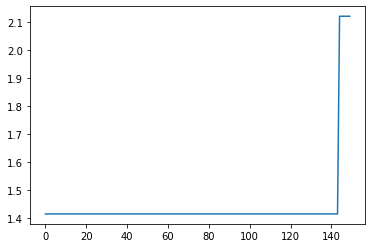

In [6]:
reachability_distance(n_neighbors=2, data=data1)

Numero di punti: 150
Numero di noisy point: 0
Numero di cluster trovati: 3


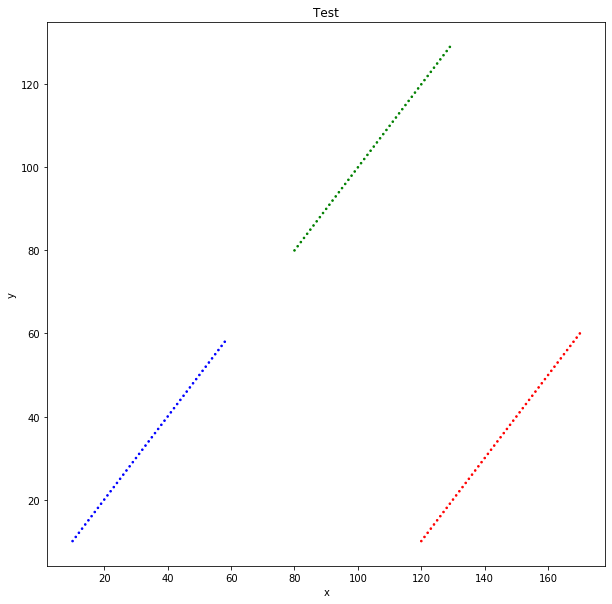

In [7]:
dbscan = DBSCAN(eps =1.42, min_samples = 2).fit(data1) 
plot_model(dbscan, data1, "Test")

### DBSCAN dataset n°2

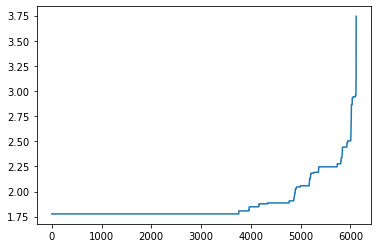

In [222]:
reachability_distance(n_neighbors=20, data=data2)

Numero di punti: 6118
Numero di noisy point: 115
Numero di cluster trovati: 4


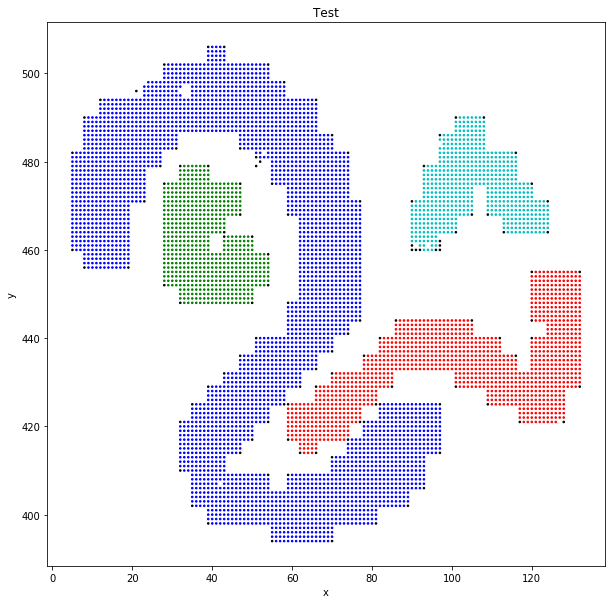

In [233]:
dbscan = DBSCAN(eps = 2.5, min_samples = 20).fit(data2)
plot_model(dbscan, data2, "Test")

### DBSCAN dataset n°3

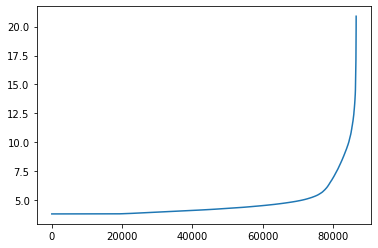

In [256]:
reachability_distance(n_neighbors=100, data=data3)

Numero di punti: 86558
Numero di noisy point: 7653
Numero di cluster trovati: 5


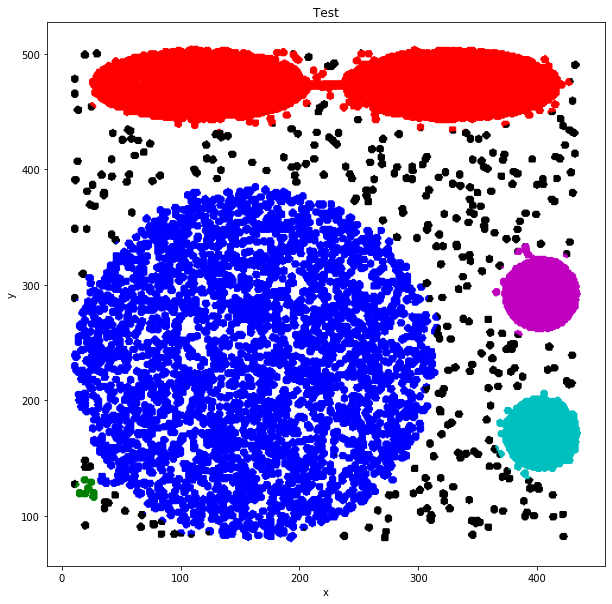

In [10]:
dbscan = DBSCAN(eps = 8, min_samples = 100).fit(data3)
plot_model(dbscan, data3, "Test")